In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [8]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/zomato_original.csv')

In [9]:
data.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [11]:
data.isnull().sum().sort_values(ascending = False)

dish_liked                     28078
rate                            7775
phone                           1208
approx_cost(for two people)      346
rest_type                        227
cuisines                          45
location                          21
address                            0
name                               0
online_order                       0
book_table                         0
listed_in(city)                    0
votes                              0
listed_in(type)                    0
reviews_list                       0
menu_item                          0
url                                0
dtype: int64

In [12]:
#Deleting Unnnecessary Columns
df=data.drop(['url','phone'],axis=1)

### Remove duplicates

In [13]:
df.duplicated().sum()

43

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

0

### Handling missing values

In [16]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

# Rename columns

In [17]:
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [18]:
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [19]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


### Data cleaning

In [20]:
df.dtypes
# cost should be float type
# rate should be loat type

address         object
name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
rest_type       object
dish_liked      object
cuisines        object
cost            object
reviews_list    object
menu_item       object
type            object
city            object
dtype: object

In [21]:
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [22]:
# remove the commas
df['cost'] = df['cost'].apply(lambda x: x.replace(',',''))
# convert to float
df['cost'] = df['cost'].astype(float)

In [23]:
print(df['cost'].unique())

print('---'*20)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [24]:
#Reading uninque values from the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [25]:
#getting rid of "NEW"
df = df.loc[df.rate !='NEW'] 

In [26]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [27]:
#Removing '/5' from Rates

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

# VISUALIZATION

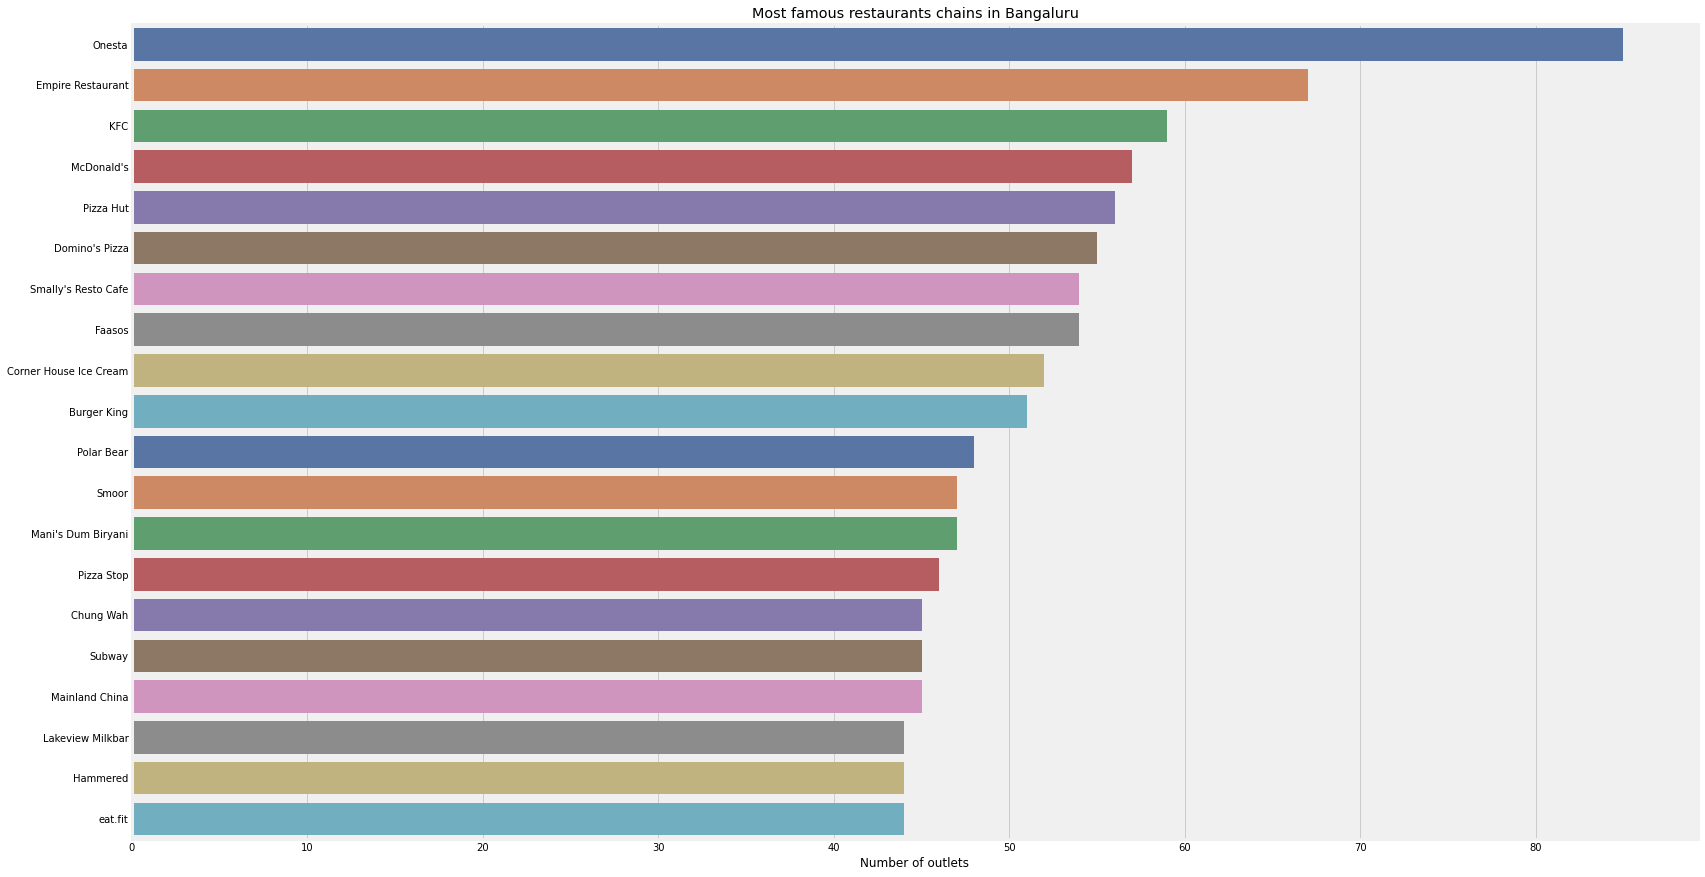

In [53]:
# Most famous restaurant chains in Bengaluru
plt.figure(figsize=(25,15))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()

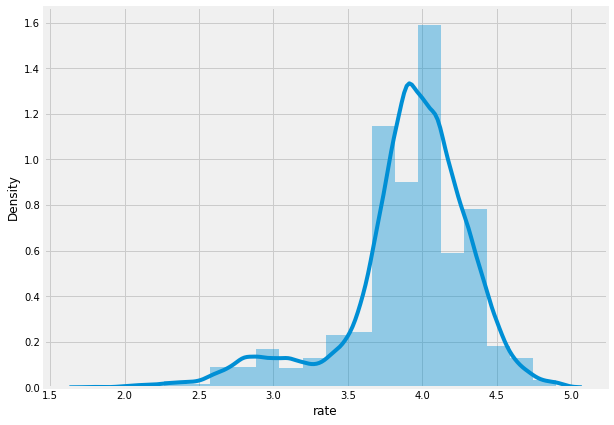

In [29]:
#How ratings are distributed
plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)

We can infer from above that most of the ratings are within 3.5 and 4.5

In [30]:
print (f'lowest rating is {df.rate.min()}')
print (f'highest rating is {df.rate.max()}')

lowest rating is 1.8
highest rating is 4.9 


In [32]:
df['rate']=df['rate'].astype(float)

In [33]:
print (f'Number of ratings between 1 to 2 are:{((df.rate>=1) & (df.rate<2)).sum()}')
print (f'Number of ratings between 2 to 3 are:{((df.rate>=2) & (df.rate<3)).sum()}')
print (f'Number of ratings between 3 to 4 are:{((df.rate>=3) & (df.rate<4)).sum()}')
print (f'Number of ratings between 4 to 5 are:{(df.rate>=4).sum()}')


Number of ratings between 1 to 2 are:5
Number of ratings between 2 to 3 are:1179
Number of ratings between 3 to 4 are:10153
Number of ratings between 4 to 5 are:11911


In [59]:
((df['rate']>=1) & (df['rate']<2)).value_counts()

False    23243
True         5
Name: rate, dtype: int64

In [35]:
df['type'].value_counts()

Delivery              10657
Dine-out               8006
Desserts               1364
Cafes                  1066
Drinks & nightlife      879
Buffet                  753
Pubs and bars           523
Name: type, dtype: int64

Here the two main service types are Delivery and Dine-out

{'boxes': [<matplotlib.lines.Line2D at 0x7f7ad9d52a10>],
 'caps': [<matplotlib.lines.Line2D at 0x7f7ad9d55ad0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f7ad9d5db10>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f7ad9d5d5d0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f7ad9d55050>,
  <matplotlib.lines.Line2D at 0x7f7ad9d55590>]}

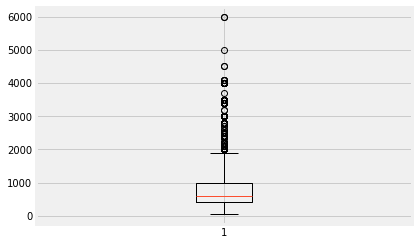

In [61]:
plt.boxplot(df['cost'])

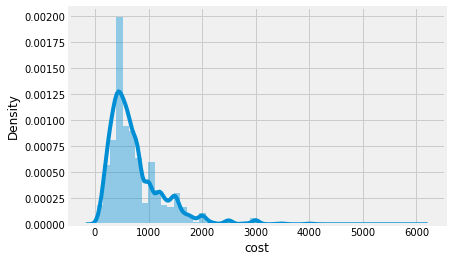

In [64]:
sns.distplot(df['cost'])

In [68]:
import re

df.index=range(df.shape[0])
likes=[]
for i in df.index:
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [69]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

These are the list of things that a restaurant must have if it is opening in Banglore

In [70]:
favourite_food.index

Index([' Pasta', ' Pizza', ' Cocktails', ' Burgers', ' Mocktails', ' Biryani',
       ' Sandwiches', 'Burgers', ' Coffee', ' Nachos',
       ...
       ' Masala Cola', ' Lychee Juice', ' Crispy Tacos', ' Nizami Biryani',
       ' Wasabi Ice Cream', ' Bun Nippat Masala', ' Cheesy Italian Fries',
       ' Red Velvet Waffle', 'Chicken Stromboli', ' Rara Meat'],
      dtype='object', length=3494)

## DATA PREPARATION

In [36]:
df.head(3)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [37]:
# Convert online categorical variables into numeric
df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0


df.online_order.value_counts()

1    16378
0     6870
Name: online_order, dtype: int64

In [38]:
df.online_order = pd.to_numeric(df.online_order)

In [39]:
# Convert book_table categorical variables into numeric
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.book_table = pd.to_numeric(df.book_table)

In [40]:
df.book_table.value_counts()

0    17191
1     6057
Name: book_table, dtype: int64

In [41]:
# Label Encoding the categorical variables

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [42]:
df.head(2)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,20,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",1386,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",5047,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,20,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",594,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",5047,Buffet,Banashankari


In [73]:
# Choosing the relvant columns
my_data=df.iloc[:,[2,3,4,5,6,7,9,10,12]]
my_data.to_csv('/content/drive/MyDrive/Colab Notebooks/GITHUB projects/9 End to End Deployment Zomato/Zomato_df.csv')

In [44]:
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head(2)

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,20,1386,800.0,5047
1,1,0,787,1,20,594,800.0,5047


In [45]:
y = df['rate']
y

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51705    3.8
51707    3.9
51708    2.8
51711    2.5
51715    4.3
Name: rate, Length: 23248, dtype: float64

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

## LINEAR REGRESSION

In [47]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.2281882852296705

## RANDOM FOREST

In [49]:
from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=42,min_samples_leaf=.0001)

RF_Model.fit(x_train,y_train)

y_predict=RF_Model.predict(x_test)

r2_score(y_test,y_predict)

0.8824399137894099

## EXTRA-TREE REGRESSOR

In [50]:
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)

0.9340103388644532

Extra Tree Regressor gives us the best model

In [74]:
#Use pickle to save model so that it can be used later

import pickle 
# Saving model to disk
pickle.dump(ET_Model, open('/content/drive/MyDrive/Colab Notebooks/GITHUB projects/9 End to End Deployment Zomato/model.pkl','wb'))
model=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/GITHUB projects/9 End to End Deployment Zomato/model.pkl','rb'))